# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_rmshared_revised.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_rmshared_revised.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [ ]:
param_short = parameters.iloc[:900]

# Posteriors

In [ ]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-1.036541,-0.156860,0.145575,-0.217813,0.392215,-0.244588,-0.233201,0.373224,0.455703,-0.214795,...,0.411670,0.226697,-0.704251,1.211917,-0.256941,-0.955365,2.516672,1.559227,-0.372246,0.453762
1,-1.232301,0.398034,-1.489951,1.020082,0.130802,-0.475731,0.400441,-1.522873,0.027722,-0.135013,...,-1.104196,-0.452067,1.132424,-0.421507,0.194757,0.068567,-1.928527,-0.940671,-0.285526,0.302120
2,-1.237319,1.029113,-0.808862,0.545717,0.120360,0.068938,-0.815555,1.820647,0.332614,0.133349,...,-0.736121,0.195306,1.338073,-0.125920,0.531341,-0.761562,-1.192081,-0.511697,-0.223581,0.614256
3,-1.093433,1.052124,0.301730,0.334105,0.048445,-0.081678,1.915841,-0.396946,0.126552,-0.037969,...,-0.489647,-0.084500,-0.050556,0.661096,-0.703103,-0.634869,2.206004,0.516681,-0.847022,0.501425
4,-0.911075,2.235642,1.944604,0.598662,0.039122,-0.737412,1.408620,1.576041,0.127367,-0.252370,...,0.752169,-1.494820,-0.084047,0.978625,-1.165678,-1.074126,0.051066,-0.280586,-0.249614,0.567755
5,-1.138724,-0.751105,-0.533135,0.150143,0.515049,-0.146363,-1.417022,-0.756786,0.362158,-0.205004,...,-1.233388,0.448039,-0.600872,-0.258451,-0.031953,-1.374489,-0.041056,0.065058,-0.907941,1.355772
6,-1.064522,2.333261,1.080964,0.570896,-0.176711,-0.402317,1.385241,0.642610,0.130066,-0.199462,...,-0.722486,-0.502571,0.549256,-1.354730,0.566834,-0.618695,0.433831,0.334711,-0.117442,0.441515
7,-0.775210,-0.129469,0.286725,0.599638,-0.044644,0.014591,-0.211311,0.373538,0.733905,-0.363447,...,-1.557479,0.421739,-3.005590,0.607618,0.079498,-0.416002,0.569675,-0.184467,-0.187396,0.115333
8,-1.132289,0.922146,-0.145909,0.176150,0.275213,-0.072674,1.678166,-0.774101,0.253544,-0.301784,...,-1.020528,-0.064908,1.095224,-1.698065,1.070875,-0.519934,-0.392753,0.346062,-0.564996,0.765535
9,-0.819469,-0.301831,-0.150959,0.459886,0.012550,-0.216980,-1.186634,0.324970,0.226576,0.238022,...,-1.122839,-1.171079,-0.388788,0.788990,-0.209045,-1.256312,2.364408,-0.455033,-0.466032,0.534088


In [ ]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [ ]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


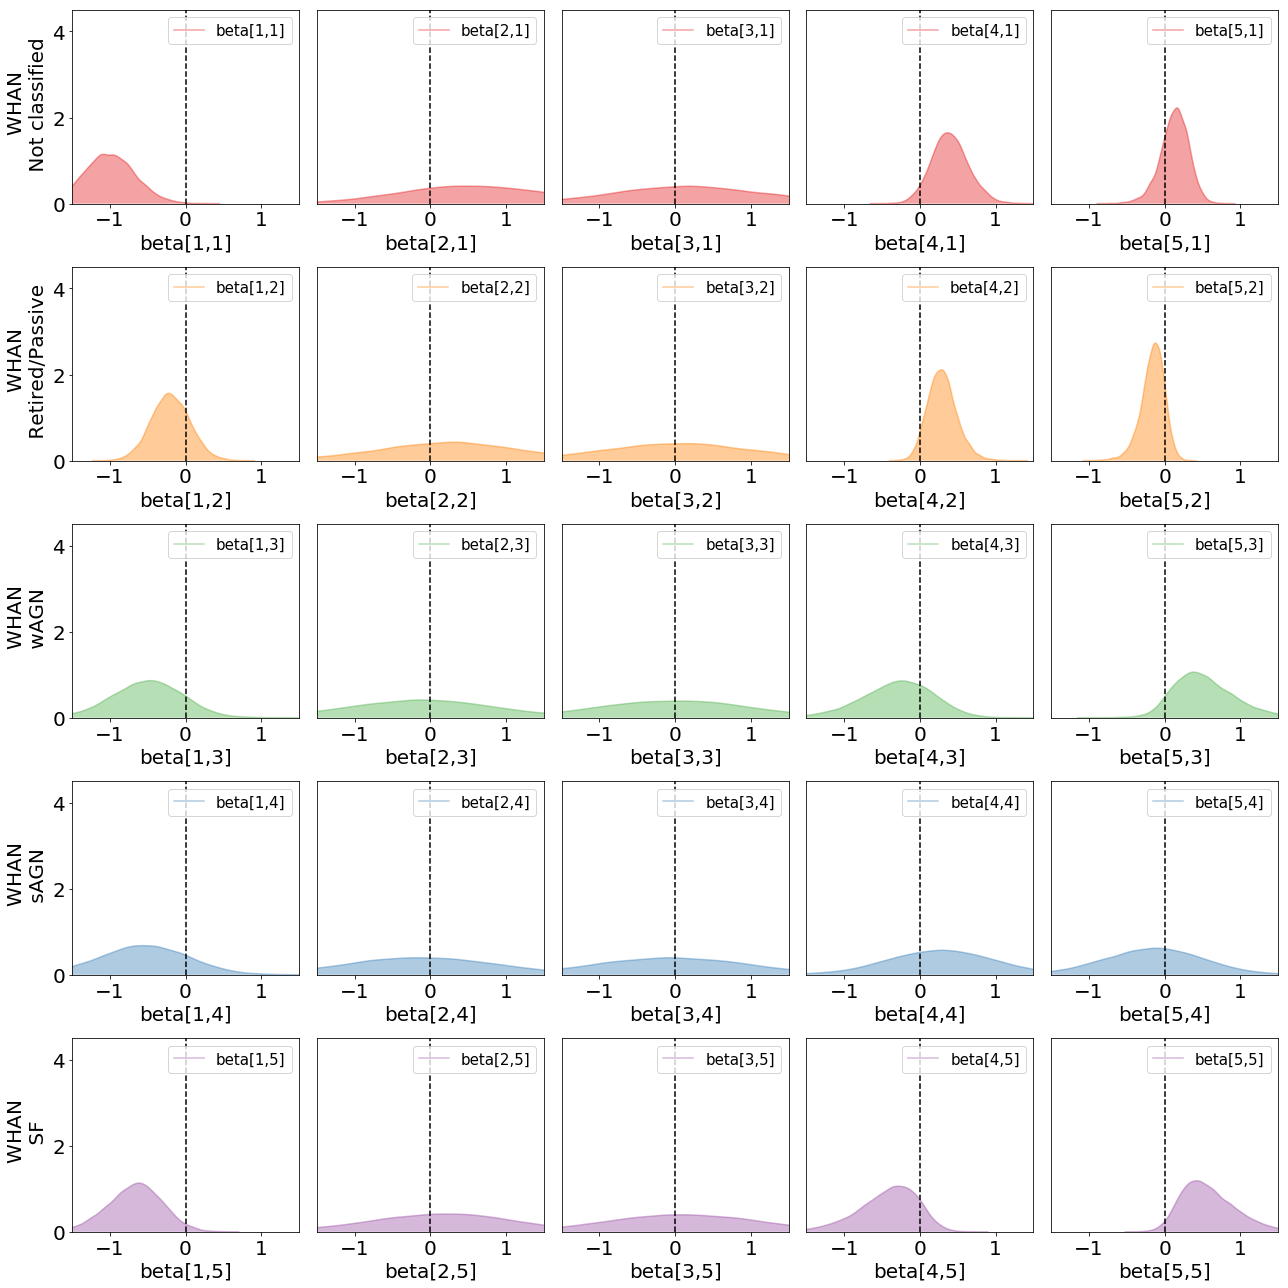

In [ ]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.5,1.5])
        plt.ylim([0,4.5])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
# plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
# plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [ ]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_rmshared_revised.csv'))

In [ ]:
entire_fit.keys()

In [ ]:
header = np.array(entire_fit.keys())

In [ ]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [ ]:
probabilities = entire_fit[prob_keys]

In [ ]:
probabilities

In [ ]:
probabilities_transposed = probabilities.T

In [ ]:
print(probabilities_transposed.columns)

In [ ]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

In [ ]:
probabilities_transposed.columns = new_header

In [ ]:
probabilities_transposed

In [ ]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [ ]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

In [ ]:
print(shrinked_df.values.shape, parameters.shape)

In [ ]:
loc = shrinked_df.iloc[0, :].size
print(loc)

In [ ]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [ ]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [ ]:
shrinked_df

In [ ]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_rmshared_revised.csv'))

In [ ]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [ ]:
zu = np.unique(prob02['LOG_STELLAR_MASS'].values)

In [ ]:
subset = prob02[prob02['LOG_STELLAR_MASS'].values==zu[12]]

In [ ]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,1.])
plt.show()

In [ ]:
np.unique(prob01['Z'].values)

In [ ]:
subset = prob01[prob01['Z']<0.07]

In [ ]:
subset

In [ ]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [ ]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summary_rmshared_revised.csv'))

In [ ]:
summary_stan

In [ ]:
prob01_stan = summary_stan.iloc[:900, :]

In [ ]:
prob01_stan

In [ ]:
chosen_mass = np.unique(prob01_stan['LOG_STELLAR_MASS'].values)[12]

In [ ]:
chosen_mass

In [ ]:
subset_temp = prob01_stan[prob01_stan['LOG_STELLAR_MASS']==chosen_mass]

In [ ]:
subset_temp

In [ ]:
plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
plt.show()

In [ ]:
%matplotlib notebook

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
#                 linewidth=0, antialiased=False)
ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
plt.show()

In [ ]:
# prob01.boxplot(column='50%')

In [ ]:
# prob01_stan.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [ ]:
m = 0
z = np.arange(0., 0.5, 0.01)
p = posteriors

In [ ]:
# regression = []
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))

        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [ ]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [ ]:
idx = np.where(beta<=20)

In [ ]:
plt.plot(redsh[idx], prob[idx], '-', alpha=0.2)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()